In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/skin-cancer-mnist-ham10000


# Analisis exploratorio del dataset y preparación de datos

## Preparación de datos:

In [21]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from glob import glob

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [22]:
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/skin-cancer-mnist-ham10000


In [23]:
metadata_file = os.path.join(path, 'HAM10000_metadata.csv')
df = pd.read_csv(metadata_file)

print("="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
print(f"\nDimensiones del dataset: {df.shape}")
print(f"\nColumnas disponibles:\n{df.columns.tolist()}")
print(f"\nPrimeras filas del dataset:")
display(df.head())
print(f"\nInformación del dataset:")
df.info()

INFORMACIÓN GENERAL DEL DATASET

Dimensiones del dataset: (10015, 7)

Columnas disponibles:
['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

Primeras filas del dataset:


lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [24]:
# Crear diccionario con rutas de todas las imágenes
image_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                   for x in glob(os.path.join(path, '**', '*.jpg'), recursive=True)}

df['path'] = df['image_id'].map(image_path_dict.get)
print(f"Imágenes encontradas: {df['path'].notna().sum()} de {len(df)}")
print(f"Imágenes faltantes: {df['path'].isna().sum()}")

Imágenes encontradas: 10015 de 10015
Imágenes faltantes: 0


## Análisis de Distribución de Clases

El dataset HAM10000 contiene 7 categorías diagnósticas diferentes de lesiones cutáneas.

In [25]:
class_names = {
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

print("="*60)
print("ANÁLISIS DE CLASES")
print("="*60)

print("\nDistribución de clases:")
class_counts = df['dx'].value_counts()
for dx, count in class_counts.items():
    print(f"{class_names[dx]} ({dx}): {count} imágenes ({count/len(df)*100:.2f}%)")

ANÁLISIS DE CLASES

Distribución de clases:
Melanocytic nevi (nv): 6705 imágenes (66.95%)
Melanoma (mel): 1113 imágenes (11.11%)
Benign keratosis (bkl): 1099 imágenes (10.97%)
Basal cell carcinoma (bcc): 514 imágenes (5.13%)
Actinic keratoses (akiec): 327 imágenes (3.27%)
Vascular lesions (vasc): 142 imágenes (1.42%)
Dermatofibroma (df): 115 imágenes (1.15%)


In [26]:
# Crear columna binaria: melanoma vs no melanoma
df['is_melanoma'] = df['dx'].apply(lambda x: 'Melanoma' if x == 'mel' else 'No Melanoma')

print("="*60)
print("CLASIFICACIÓN BINARIA: MELANOMA vs NO MELANOMA")
print("="*60)
print(df['is_melanoma'].value_counts())
print(f"\nPorcentaje de melanomas: {(df['is_melanoma']=='Melanoma').sum()/len(df)*100:.2f}%")
print(f"Porcentaje de no melanomas: {(df['is_melanoma']=='No Melanoma').sum()/len(df)*100:.2f}%")
print(f"\nRatio de desbalance: 1:{(df['dx']!='mel').sum()/(df['dx']=='mel').sum():.2f}")

CLASIFICACIÓN BINARIA: MELANOMA vs NO MELANOMA
is_melanoma
No Melanoma    8902
Melanoma       1113
Name: count, dtype: int64

Porcentaje de melanomas: 11.11%
Porcentaje de no melanomas: 88.89%

Ratio de desbalance: 1:8.00


In [27]:
print("="*60)
print("ANÁLISIS DEMOGRÁFICO")
print("="*60)

print(f"\nDistribución por género:")
print(df['sex'].value_counts())
print(f"\n% por género:")
print(df['sex'].value_counts(normalize=True) * 100)

print(f"\nEstadísticas de edad:")
print(df['age'].describe())

print(f"\nLocalización más común:")
print(df['localization'].value_counts().head(10))

ANÁLISIS DEMOGRÁFICO

Distribución por género:
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

% por género:
sex
male       53.979031
female     45.451822
unknown     0.569146
Name: proportion, dtype: float64

Estadísticas de edad:
count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

Localización más común:
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
Name: count, dtype: int64


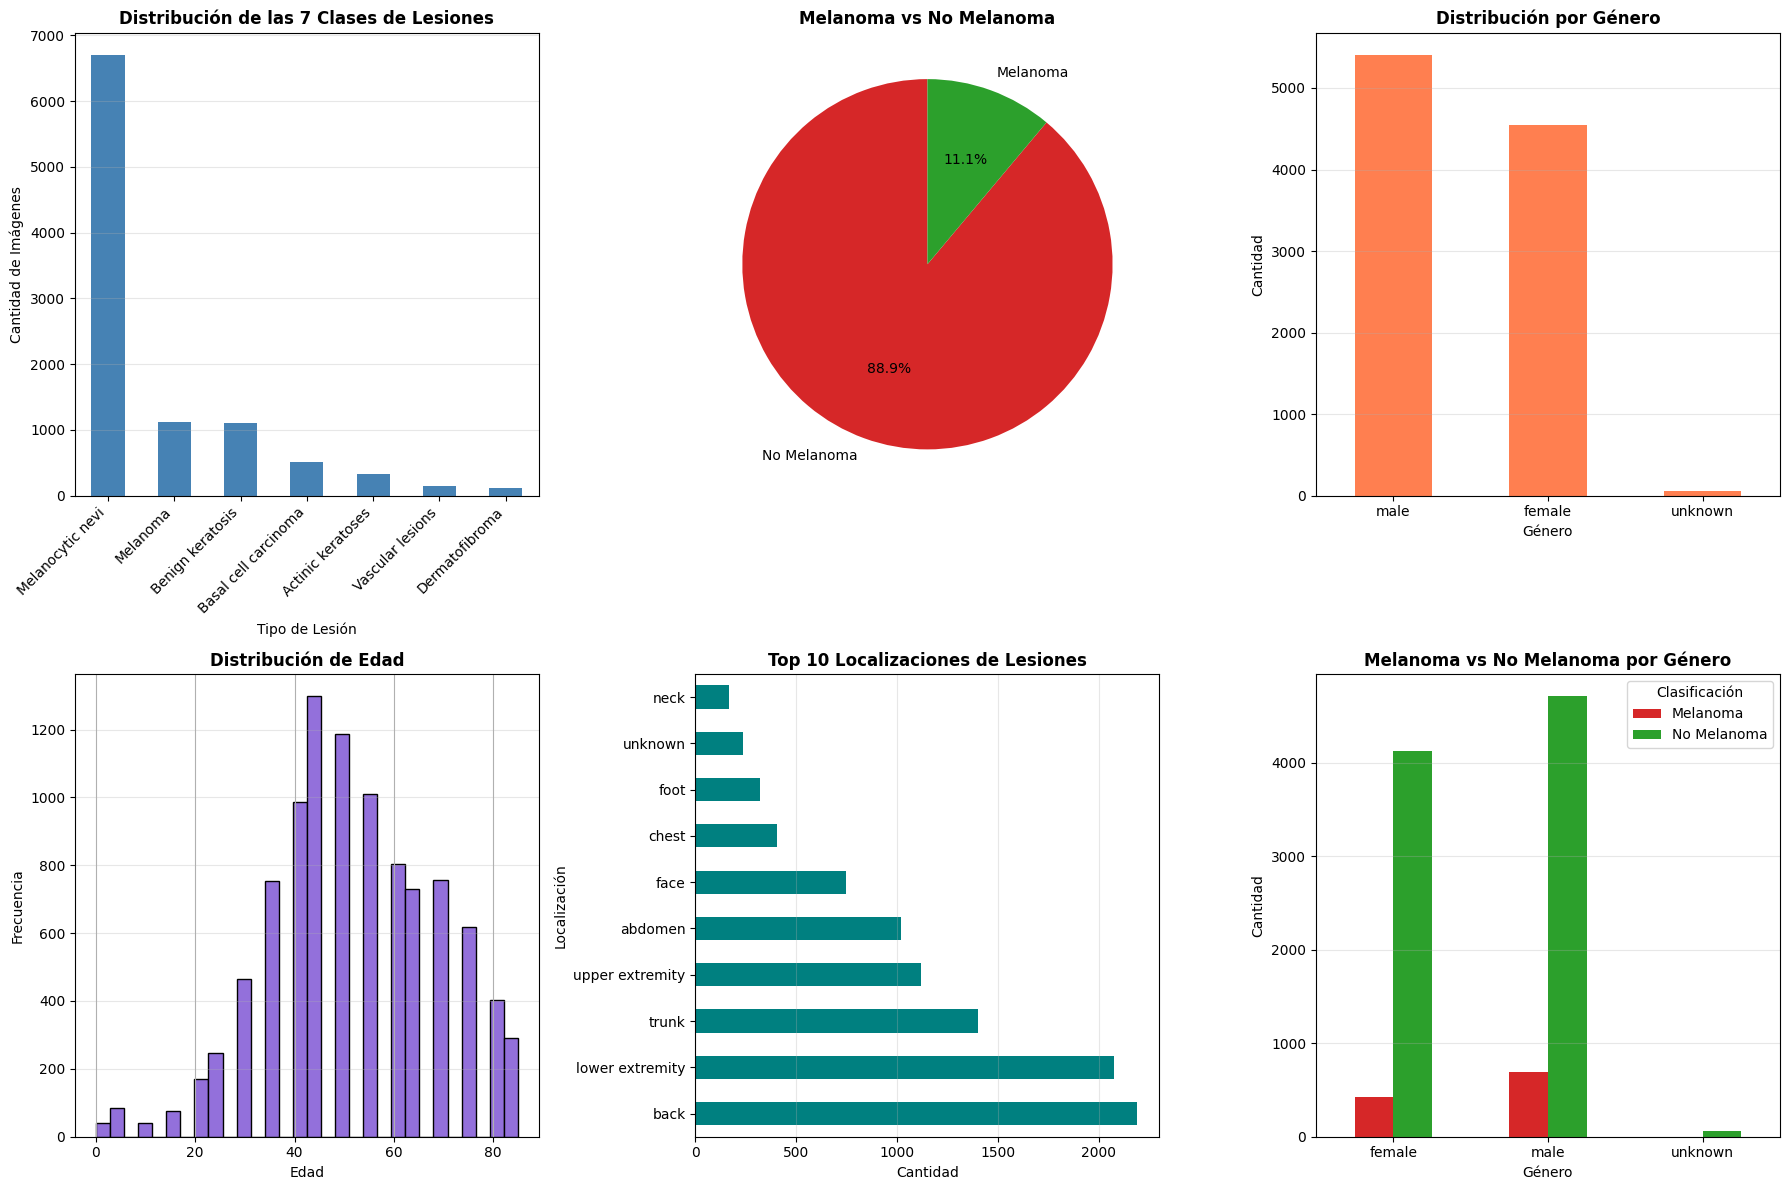


✓ Gráficos guardados en 'analisis_exploratorio_ham10000.png'


In [28]:
fig = plt.figure(figsize=(18, 12))

# Gráfico 1: Distribución de todas las clases
ax1 = plt.subplot(2, 3, 1)
class_counts.plot(kind='bar', color='steelblue', ax=ax1)
ax1.set_title('Distribución de las 7 Clases de Lesiones', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tipo de Lesión')
ax1.set_ylabel('Cantidad de Imágenes')
ax1.set_xticklabels([class_names[dx] for dx in class_counts.index], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Clasificación binaria
ax2 = plt.subplot(2, 3, 2)
binary_counts = df['is_melanoma'].value_counts()
colors = ['#d62728', '#2ca02c']
ax2.pie(binary_counts, labels=binary_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Melanoma vs No Melanoma', fontsize=12, fontweight='bold')

# Gráfico 3: Distribución por género
ax3 = plt.subplot(2, 3, 3)
df['sex'].value_counts().plot(kind='bar', color='coral', ax=ax3)
ax3.set_title('Distribución por Género', fontsize=12, fontweight='bold')
ax3.set_xlabel('Género')
ax3.set_ylabel('Cantidad')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(axis='y', alpha=0.3)

# Gráfico 4: Distribución de edad
ax4 = plt.subplot(2, 3, 4)
df['age'].hist(bins=30, color='mediumpurple', edgecolor='black', ax=ax4)
ax4.set_title('Distribución de Edad', fontsize=12, fontweight='bold')
ax4.set_xlabel('Edad')
ax4.set_ylabel('Frecuencia')
ax4.grid(axis='y', alpha=0.3)

# Gráfico 5: Localización de lesiones
ax5 = plt.subplot(2, 3, 5)
top_locations = df['localization'].value_counts().head(10)
top_locations.plot(kind='barh', color='teal', ax=ax5)
ax5.set_title('Top 10 Localizaciones de Lesiones', fontsize=12, fontweight='bold')
ax5.set_xlabel('Cantidad')
ax5.set_ylabel('Localización')
ax5.grid(axis='x', alpha=0.3)

# Gráfico 6: Melanoma por género
ax6 = plt.subplot(2, 3, 6)
melanoma_by_sex = pd.crosstab(df['sex'], df['is_melanoma'])
melanoma_by_sex.plot(kind='bar', stacked=False, color=['#d62728', '#2ca02c'], ax=ax6)
ax6.set_title('Melanoma vs No Melanoma por Género', fontsize=12, fontweight='bold')
ax6.set_xlabel('Género')
ax6.set_ylabel('Cantidad')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=0)
ax6.legend(title='Clasificación')
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_exploratorio_ham10000.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráficos guardados en 'analisis_exploratorio_ham10000.png'")

## Comparación Visual del dataset

A continuación se muestran 10 ejemplos de melanomas y 10 ejemplos de no melanomas para visualizar las diferencias.

VISUALIZACIÓN DE IMÁGENES DE MUESTRA


/tmp/ipykernel_48/3182596219.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_melanoma_samples = df[df['dx'] != 'mel'].groupby('dx', group_keys=False).apply(


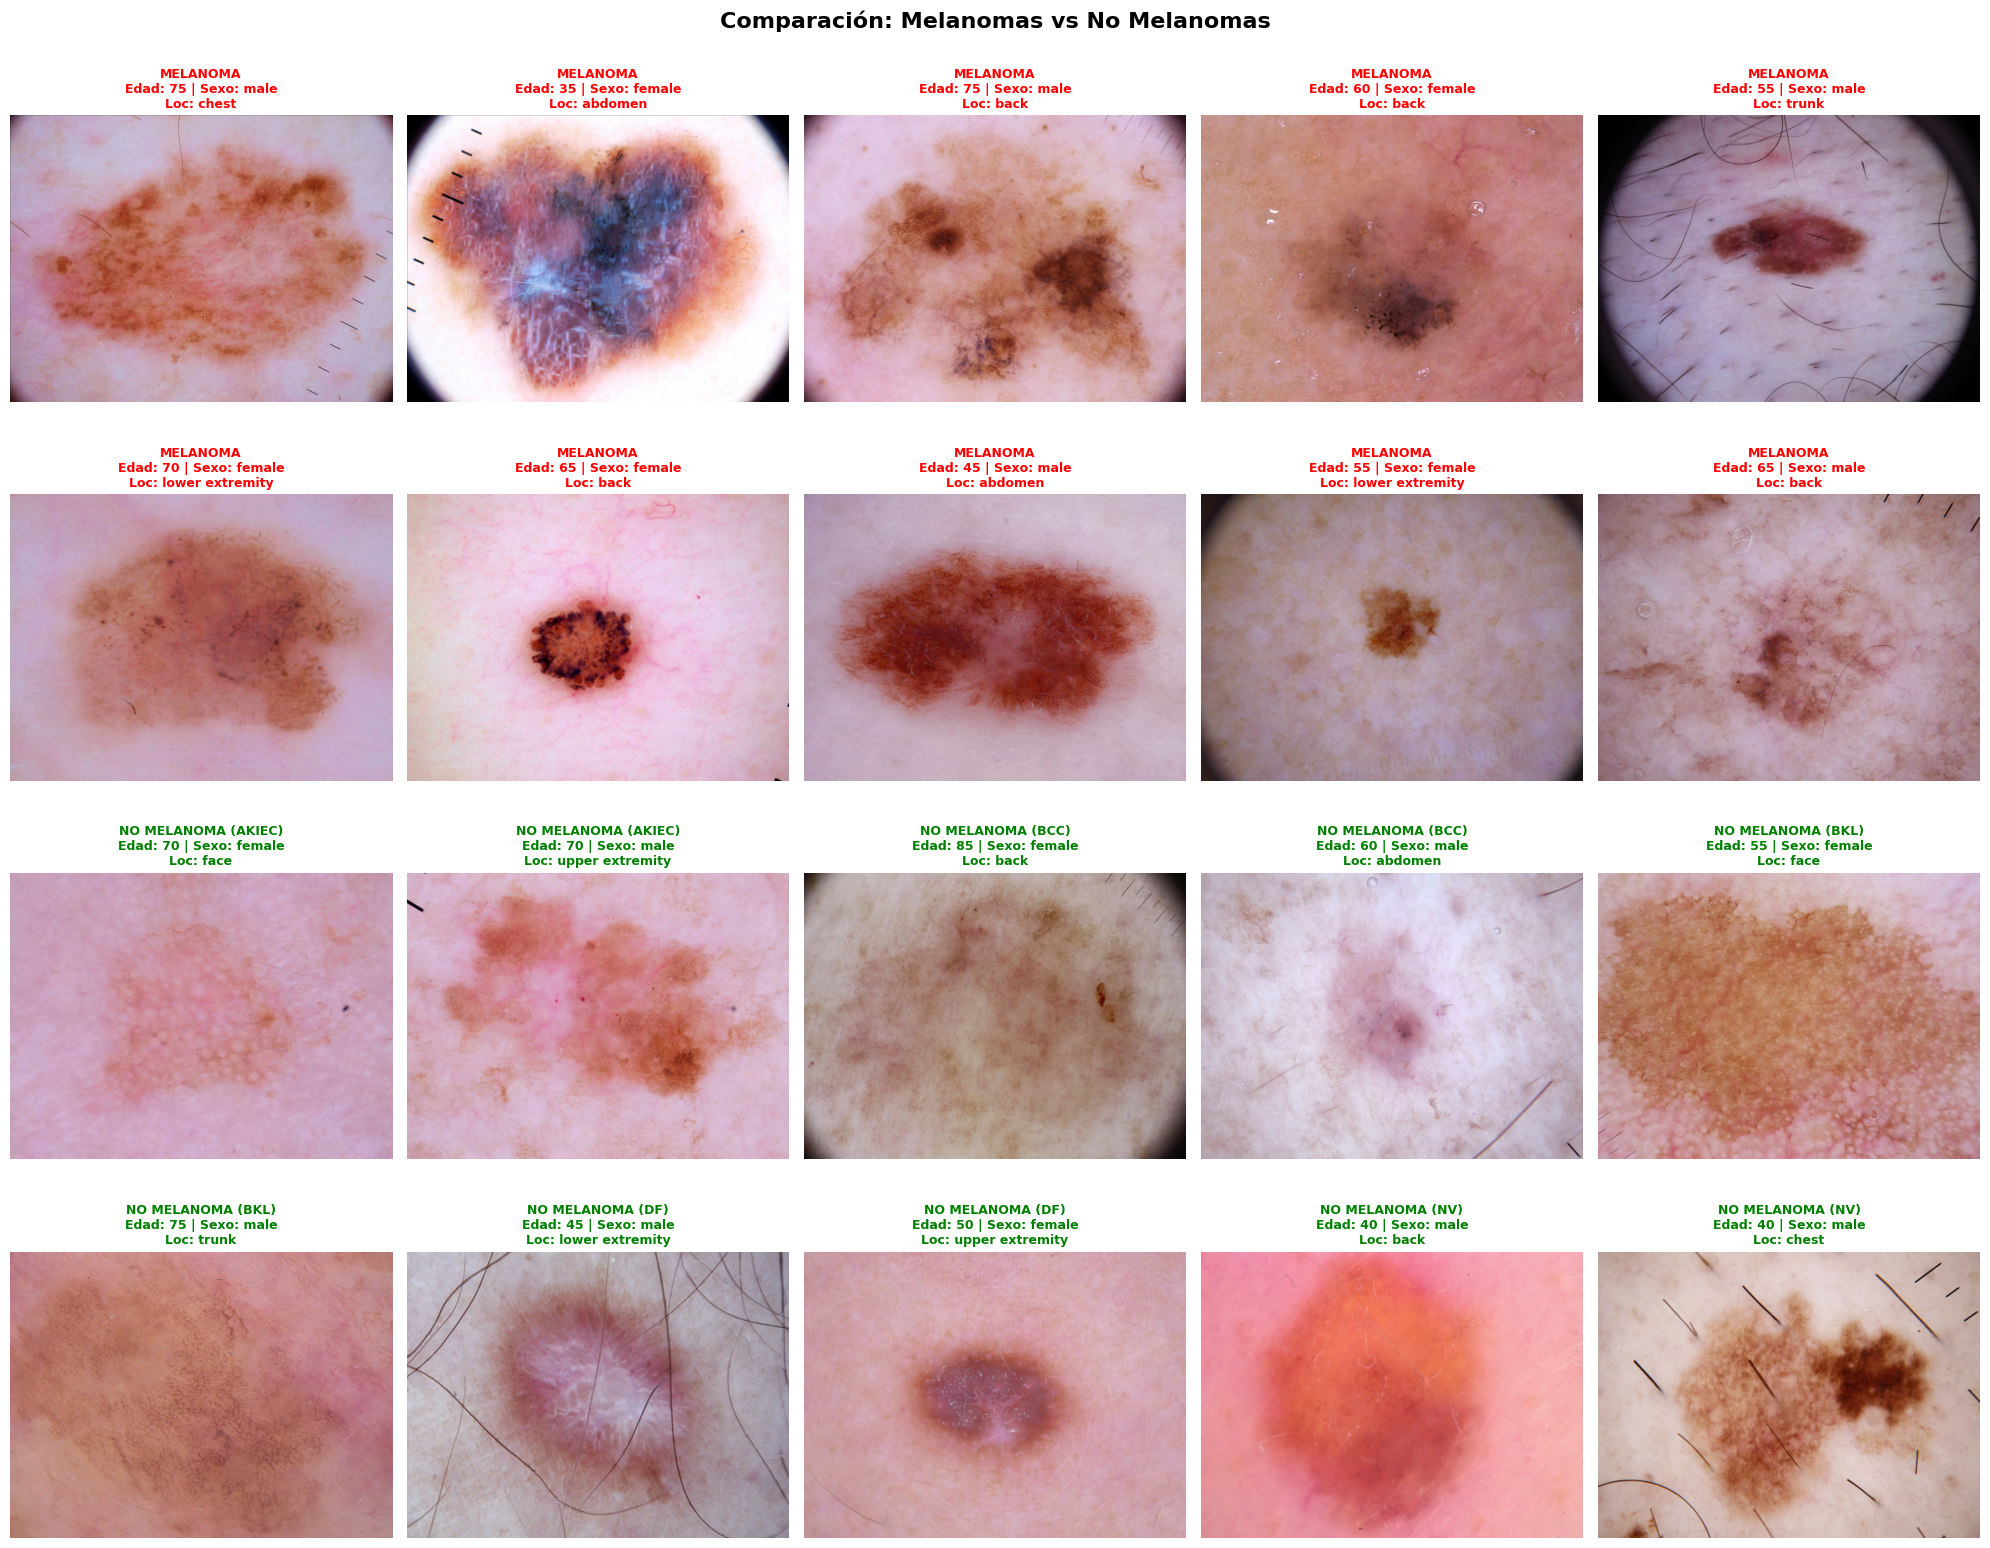

In [29]:
print("="*60)
print("VISUALIZACIÓN DE IMÁGENES DE MUESTRA")
print("="*60)

# Seleccionar 10 imágenes de melanoma
melanoma_samples = df[df['dx'] == 'mel'].sample(n=10, random_state=42)

# Seleccionar 10 imágenes de no melanoma (variedad de clases)
non_melanoma_samples = df[df['dx'] != 'mel'].groupby('dx', group_keys=False).apply(
    lambda x: x.sample(min(2, len(x)), random_state=42)
).head(10)

fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Comparación: Melanomas vs No Melanomas', fontsize=16, fontweight='bold', y=0.995)

# Mostrar melanomas (primeras 2 filas)
for idx, (i, row) in enumerate(melanoma_samples.iterrows()):
    ax = axes[idx//5, idx%5]
    img_path = row['path']
    if pd.notna(img_path) and os.path.exists(img_path):
        img = Image.open(img_path)
        ax.imshow(img)
        edad_str = f"{row['age']:.0f}" if pd.notna(row['age']) else 'N/A'
        ax.set_title(f"MELANOMA\nEdad: {edad_str} | Sexo: {row['sex']}\nLoc: {row['localization']}",
                     fontsize=9, color='red', fontweight='bold')
    ax.axis('off')

# Mostrar no melanomas (últimas 2 filas)
for idx, (i, row) in enumerate(non_melanoma_samples.iterrows()):
    ax = axes[(idx//5) + 2, idx%5]
    img_path = row['path']
    if pd.notna(img_path) and os.path.exists(img_path):
        img = Image.open(img_path)
        ax.imshow(img)
        edad_str = f"{row['age']:.0f}" if pd.notna(row['age']) else 'N/A'
        ax.set_title(f"NO MELANOMA ({row['dx'].upper()})\nEdad: {edad_str} | Sexo: {row['sex']}\nLoc: {row['localization']}",
                     fontsize=9, color='green', fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()



In [30]:
print("="*60)
print("ESTADÍSTICAS DETALLADAS POR CLASE")
print("="*60)

for dx in df['dx'].unique():
    subset = df[df['dx'] == dx]
    print(f"\n{class_names[dx]} ({dx}):")
    print(f"  - Total de imágenes: {len(subset)}")
    print(f"  - Edad promedio: {subset['age'].mean():.1f} años")
    print(f"  - Distribución por género:")
    print(f"    {subset['sex'].value_counts().to_dict()}")
    print(f"  - Localización más común: {subset['localization'].mode()[0] if len(subset['localization'].mode()) > 0 else 'N/A'}")

ESTADÍSTICAS DETALLADAS POR CLASE

Benign keratosis (bkl):
  - Total de imágenes: 1099
  - Edad promedio: 64.3 años
  - Distribución por género:
    {'male': 626, 'female': 463, 'unknown': 10}
  - Localización más común: face

Melanocytic nevi (nv):
  - Total de imágenes: 6705
  - Edad promedio: 46.5 años
  - Distribución por género:
    {'male': 3421, 'female': 3237, 'unknown': 47}
  - Localización más común: lower extremity

Dermatofibroma (df):
  - Total de imágenes: 115
  - Edad promedio: 53.0 años
  - Distribución por género:
    {'male': 63, 'female': 52}
  - Localización más común: lower extremity

Melanoma (mel):
  - Total de imágenes: 1113
  - Edad promedio: 60.7 años
  - Distribución por género:
    {'male': 689, 'female': 424}
  - Localización más común: back

Vascular lesions (vasc):
  - Total de imágenes: 142
  - Edad promedio: 51.4 años
  - Distribución por género:
    {'female': 73, 'male': 69}
  - Localización más común: trunk

Basal cell carcinoma (bcc):
  - Total de i

In [31]:
print("="*60)
print("RESUMEN ESTADÍSTICO FINAL")
print("="*60)
print(f"\nTotal de imágenes: {len(df)}")
print(f"Total de melanomas: {(df['dx']=='mel').sum()}")
print(f"Total de no melanomas: {(df['dx']!='mel').sum()}")
print(f"Ratio de desbalance: 1:{(df['dx']!='mel').sum()/(df['dx']=='mel').sum():.2f}")

print(f"\nLesiones únicas (lesion_id): {df['lesion_id'].nunique()}")
print(f"Imágenes duplicadas de la misma lesión: {len(df) - df['lesion_id'].nunique()}")

print(f"\nRango de edad: {df['age'].min():.0f} - {df['age'].max():.0f} años")
print(f"Edad promedio: {df['age'].mean():.1f} años")
print(f"Mediana de edad: {df['age'].median():.1f} años")

print(f"\nDatos faltantes:")
print(df.isnull().sum())

RESUMEN ESTADÍSTICO FINAL

Total de imágenes: 10015
Total de melanomas: 1113
Total de no melanomas: 8902
Ratio de desbalance: 1:8.00

Lesiones únicas (lesion_id): 7470
Imágenes duplicadas de la misma lesión: 2545

Rango de edad: 0 - 85 años
Edad promedio: 51.9 años
Mediana de edad: 50.0 años

Datos faltantes:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
is_melanoma      0
dtype: int64


# Normalización de imagenes


Procesamiento y configuración de imagenes

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import cv2
from tqdm import tqdm

# Configuración
IMG_SIZE = 224  # EfficientNetV2-S espera 224x224 por defecto
BATCH_SIZE = 32
RANDOM_STATE = 42


In [33]:
def load_and_preprocess_images(dataframe, img_size=224):
    """
    Carga y preprocesa todas las imágenes del dataset

    Args:
        dataframe: DataFrame con columna 'path' con rutas de imágenes
        img_size: Tamaño objetivo para redimensionar (default: 224x224)

    Returns:
        images: Array numpy con imágenes en formato uint8 [0, 255]
        valid_indices: Índices de imágenes válidas cargadas
    """
    images = []
    valid_indices = []

    print(f"Cargando {len(dataframe)} imágenes...")

    for idx, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
        img_path = row['path']

        if pd.notna(img_path) and os.path.exists(img_path):
            try:
                # Cargar imagen con OpenCV
                img = cv2.imread(img_path)

                # Convertir de BGR a RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Redimensionar a 224x224
                img = cv2.resize(img, (img_size, img_size))

                # NO normalizamos aquí: preprocess_input lo hará después
                # Mantenemos valores en rango [0, 255] como uint8
                images.append(img)
                valid_indices.append(idx)

            except Exception as e:
                print(f"Error al cargar imagen {img_path}: {e}")
                continue

    images = np.array(images, dtype='uint8')
    print(f"\nImágenes cargadas exitosamente: {len(images)}")
    print(f"Shape del array: {images.shape}")
    print(f"Rango de valores: [{images.min()}, {images.max()}]")
    print(f"Dtype: {images.dtype}")

    return images, valid_indices

# Cargar todas las imágenes
X, valid_indices = load_and_preprocess_images(df, img_size=IMG_SIZE)

# Filtrar el dataframe para mantener solo las imágenes válidas
df_valid = df.loc[valid_indices].reset_index(drop=True)
print(f"\nDataset válido: {len(df_valid)} muestras")


Cargando 10015 imágenes...


100%|██████████| 10015/10015 [01:13<00:00, 136.26it/s]



Imágenes cargadas exitosamente: 10015
Shape del array: (10015, 224, 224, 3)
Rango de valores: [0, 255]
Dtype: uint8

Dataset válido: 10015 muestras


In [34]:
# Crear labels binarios: 1 para melanoma, 0 para no melanoma
y = (df_valid['dx'] == 'mel').astype(int).values

print("="*60)
print("PREPARACIÓN DE LABELS")
print("="*60)
print(f"Total de muestras: {len(y)}")
print(f"Melanomas (clase 1): {y.sum()} ({y.sum()/len(y)*100:.2f}%)")
print(f"No melanomas (clase 0): {len(y) - y.sum()} ({(len(y)-y.sum())/len(y)*100:.2f}%)")
print(f"\nShape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

PREPARACIÓN DE LABELS
Total de muestras: 10015
Melanomas (clase 1): 1113 (11.11%)
No melanomas (clase 0): 8902 (88.89%)

Shape de X: (10015, 224, 224, 3)
Shape de y: (10015,)


In [35]:

# Paso 1: Separar train+val (90%) y test (10%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.10,
    random_state=RANDOM_STATE,
    stratify=y  # Mantener proporción de clases
)

# Paso 2: Separar train (70% del total) y validation (20% del total)
# 70/90 ≈ 0.778 para obtener 70% del dataset original
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.222,  # 20% del total = 0.222 de 90%
    random_state=RANDOM_STATE,
    stratify=y_temp  # Mantener proporción de clases
)

print("\nDivisión del dataset:")
print(f"{'Set':<15} {'Tamaño':<10} {'%':<10} {'Melanoma':<12} {'No Melanoma':<12}")
print("-" * 60)
print(f"{'Train':<15} {len(X_train):<10} {len(X_train)/len(X)*100:>6.1f}%   "
      f"{y_train.sum():<12} {len(y_train)-y_train.sum():<12}")
print(f"{'Validation':<15} {len(X_val):<10} {len(X_val)/len(X)*100:>6.1f}%   "
      f"{y_val.sum():<12} {len(y_val)-y_val.sum():<12}")
print(f"{'Test':<15} {len(X_test):<10} {len(X_test)/len(X)*100:>6.1f}%   "
      f"{y_test.sum():<12} {len(y_test)-y_test.sum():<12}")
print("-" * 60)
print(f"{'TOTAL':<15} {len(X):<10} {100.0:>6.1f}%   "
      f"{y.sum():<12} {len(y)-y.sum():<12}")

# Verificar proporciones de melanoma en cada set
print("\nProporción de melanoma por set:")
print(f"  Train:      {y_train.mean()*100:.2f}%")
print(f"  Validation: {y_val.mean()*100:.2f}%")
print(f"  Test:       {y_test.mean()*100:.2f}%")
print(f"  Original:   {y.mean()*100:.2f}%")


División del dataset:
Set             Tamaño     %          Melanoma     No Melanoma 
------------------------------------------------------------
Train           7012         70.0%   780          6232        
Validation      2001         20.0%   222          1779        
Test            1002         10.0%   111          891         
------------------------------------------------------------
TOTAL           10015       100.0%   1113         8902        

Proporción de melanoma por set:
  Train:      11.12%
  Validation: 11.09%
  Test:       11.08%
  Original:   11.11%


## Data augmentation

Aplicaremos **data augmentation** solo al **conjunto de entrenamiento** para aumentar la **variedad visual** sin recolectar más datos. Esto ayuda a **reducir overfitting** y a que el modelo aprenda **invariancias** (rotación leve, traslación, zoom, iluminación), mejorando su capacidad de **generalizar** a imágenes nuevas.

Importante:
- **No “arregla” el desbalance por sí mismo.** Aunque genere más variantes por imagen, la **proporción melanoma vs no melanoma** no cambia automáticamente.  
- El **desbalance** lo abordamos explícitamente con **`class_weight`** y, tras entrenar, con **ajuste de umbral** para priorizar *recall* (sensibilidad). El *augmentation* es **complementario**: mejora robustez, no las proporciones.

Buenas prácticas de augmentation (entrenamiento):
- Rotaciones moderadas (±15–20°), flips horizontales, *random zoom* (0.9–1.1), *width/height shift* (≤10%), y leves cambios de brillo/contraste.  
- Evitar deformaciones fuertes que cambien rasgos diagnósticos (bordes/asimetrías).  
- **Validación/Test sin augmentation** (solo *resizing* y normalización) para medir desempeño real.  
- Si existen múltiples imágenes por la misma lesión, **dividir train/val/test por `lesion_id` antes del augmentation** para evitar *leakage*.

Resumen:
- *Augmentation* → combate **overfitting** y añade **robustez**.  
- **`class_weight` + ajuste de umbral** → corrigen el **sesgo por desbalance** y alinean el modelo con la **prioridad clínica** (maximizar *recall* de melanomas).


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

# Flag para indicar si todas las imágenes son dermatoscópicas (orientación consistente)
IS_DERMATOSCOPY = False

# Data augmentation solo para entrenamiento
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Normalización específica de EfficientNetV2 (scale mode)
    rotation_range=15,            # Rotaciones aleatorias de ±15 grados
    width_shift_range=0.10,       # Desplazamiento horizontal del 10% para evitar recortar bordes importantes
    height_shift_range=0.10,      # Desplazamiento vertical del 10%
    shear_range=0.03,             # Transformación de cizallamiento mínima (3%) para no deformar lesiones
    zoom_range=(0.90, 1.10),      # Zoom aleatorio entre 90% y 110% del tamaño original
    brightness_range=(0.90, 1.10),# Variación de brillo ±10% para simular diferentes condiciones de iluminación
    horizontal_flip=True,         # Flip horizontal (válido para lesiones cutáneas)
    vertical_flip=IS_DERMATOSCOPY,# Flip vertical solo si las imágenes tienen orientación consistente
    fill_mode='reflect'           # Relleno por reflexión para evitar artefactos en los bordes
)

# Sin augmentation para validación y test (solo normalización)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

print("="*60)
print("DATA AUGMENTATION CONFIGURADO")
print("="*60)

print("\nCONJUNTO DE ENTRENAMIENTO (con augmentation):")
print(f"  • Tamaño del dataset: {len(X_train)} imágenes")
print(f"  • Transformaciones aplicadas:")
print(f"    - Rotación aleatoria: ±{train_datagen.rotation_range}°")
print(f"    - Desplazamiento horizontal: ±{train_datagen.width_shift_range*100:.0f}%")
print(f"    - Desplazamiento vertical: ±{train_datagen.height_shift_range*100:.0f}%")
print(f"    - Cizallamiento (shear): ±{train_datagen.shear_range*100:.0f}%")
print(f"    - Zoom: {train_datagen.zoom_range[0]*100:.0f}% - {train_datagen.zoom_range[1]*100:.0f}%")
print(f"    - Variación de brillo: {train_datagen.brightness_range[0]*100:.0f}% - {train_datagen.brightness_range[1]*100:.0f}%")
print(f"    - Flip horizontal: {'Activado' if train_datagen.horizontal_flip else 'Desactivado'}")
print(f"    - Flip vertical: {'Activado' if train_datagen.vertical_flip else 'Desactivado'}")
print(f"    - Modo de relleno: {train_datagen.fill_mode}")
print(f"    - Preprocesamiento: EfficientNetV2 preprocess_input")

print("\nCONJUNTO DE VALIDACIÓN (sin augmentation):")
print(f"  • Tamaño del dataset: {len(X_val)} imágenes")
print(f"  • Solo normalización con preprocess_input (sin transformaciones)")

print("\nCONJUNTO DE TEST (sin augmentation):")
print(f"  • Tamaño del dataset: {len(X_test)} imágenes")
print(f"  • Solo normalización con preprocess_input (sin transformaciones)")

print("\nEfecto esperado:")
print(f"  • Cada época de entrenamiento generará variaciones únicas de las {len(X_train)} imágenes")
print(f"  • Esto aumenta la diversidad visual sin recolectar más datos")
print(f"  • Ayuda a prevenir overfitting y mejora la generalización")
print(f"  • Val/Test sin augmentation para medir el desempeño real del modelo")

print("\n" + "="*60)
print("Data augmentation listo para usar en el entrenamiento")
print("="*60)

DATA AUGMENTATION CONFIGURADO

CONJUNTO DE ENTRENAMIENTO (con augmentation):
  • Tamaño del dataset: 7012 imágenes
  • Transformaciones aplicadas:
    - Rotación aleatoria: ±15°
    - Desplazamiento horizontal: ±10%
    - Desplazamiento vertical: ±10%
    - Cizallamiento (shear): ±3%
    - Zoom: 90% - 110%
    - Variación de brillo: 90% - 110%
    - Flip horizontal: Activado
    - Flip vertical: Desactivado
    - Modo de relleno: reflect
    - Preprocesamiento: EfficientNetV2 preprocess_input

CONJUNTO DE VALIDACIÓN (sin augmentation):
  • Tamaño del dataset: 2001 imágenes
  • Solo normalización con preprocess_input (sin transformaciones)

CONJUNTO DE TEST (sin augmentation):
  • Tamaño del dataset: 1002 imágenes
  • Solo normalización con preprocess_input (sin transformaciones)

Efecto esperado:
  • Cada época de entrenamiento generará variaciones únicas de las 7012 imágenes
  • Esto aumenta la diversidad visual sin recolectar más datos
  • Ayuda a prevenir overfitting y mejora la gen

## Class Weights (pesos de clase)

Para compensar el **desbalance de clases** (≈11% melanomas vs 89% no melanomas), calcularemos **class weights** que penalizan más los errores en la clase minoritaria (melanoma) durante el entrenamiento.

**¿Cómo funciona?**
- El modelo aprende ajustando sus pesos para **minimizar la función de pérdida** (loss).
- Sin class weights, el modelo puede "hacer trampa" clasificando todo como "no melanoma" y aún así lograr ~89% de accuracy.
- Con class weights, **un error en melanoma cuesta ~8x más** que un error en no melanoma, forzando al modelo a prestar atención a la clase minoritaria.

**Fórmula:**
$$w_i = \frac{n_{\text{total}}}{n_{\text{classes}} \times n_i}$$

Donde:
- $w_i$ = peso para la clase $i$
- $n_{\text{total}}$ = número total de muestras
- $n_{\text{classes}}$ = número de clases (2 en nuestro caso)
- $n_i$ = número de muestras de la clase $i$

**Estrategia complementaria:**
- **Class weights** → corrige el sesgo estadístico durante el entrenamiento.
- **Data augmentation** → aumenta la diversidad visual y reduce overfitting.
- **Ajuste de umbral** → tras entrenar, optimizaremos el umbral de decisión para maximizar *recall* (sensibilidad).

Estas tres técnicas combinadas permiten entrenar un modelo robusto en un dataset desbalanceado sin perder realismo clínico.

In [37]:
from sklearn.utils.class_weight import compute_class_weight

# Calcular class weights automáticamente
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convertir a diccionario para Keras
class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

print("="*60)
print("CLASS WEIGHTS CALCULADOS")
print("="*60)
print(f"\nDistribución en el conjunto de entrenamiento:")
print(f"  Clase 0 (No Melanoma): {(y_train == 0).sum()} muestras ({(y_train == 0).mean()*100:.2f}%)")
print(f"  Clase 1 (Melanoma):    {(y_train == 1).sum()} muestras ({(y_train == 1).mean()*100:.2f}%)")

print(f"\nPesos calculados:")
print(f"  class_weights[0] (No Melanoma): {class_weights[0]:.4f}")
print(f"  class_weights[1] (Melanoma):    {class_weights[1]:.4f}")

print(f"\nRatio de penalización:")
print(f"  Un error en Melanoma pesa {class_weights[1]/class_weights[0]:.2f}x más que un error en No Melanoma")

print(f"\nInterpretación:")
print(f"  • Durante el entrenamiento, cada melanoma mal clasificado contribuirá")
print(f"    {class_weights[1]/class_weights[0]:.2f}x más a la función de pérdida que un no melanoma mal clasificado.")
print(f"  • Esto fuerza al modelo a 'prestar más atención' a la clase minoritaria.")
print(f"  • Los pesos se aplicarán automáticamente al llamar model.fit(class_weight=class_weights)")

print("\n" + "="*60)
print("Class weights listos para usar en el entrenamiento")
print("="*60)

CLASS WEIGHTS CALCULADOS

Distribución en el conjunto de entrenamiento:
  Clase 0 (No Melanoma): 6232 muestras (88.88%)
  Clase 1 (Melanoma):    780 muestras (11.12%)

Pesos calculados:
  class_weights[0] (No Melanoma): 0.5626
  class_weights[1] (Melanoma):    4.4949

Ratio de penalización:
  Un error en Melanoma pesa 7.99x más que un error en No Melanoma

Interpretación:
  • Durante el entrenamiento, cada melanoma mal clasificado contribuirá
    7.99x más a la función de pérdida que un no melanoma mal clasificado.
  • Esto fuerza al modelo a 'prestar más atención' a la clase minoritaria.
  • Los pesos se aplicarán automáticamente al llamar model.fit(class_weight=class_weights)

Class weights listos para usar en el entrenamiento


# Fine-Tuning con EfficientNetV2-S

## ¿Qué es Transfer Learning y Fine-Tuning?

**Transfer Learning** consiste en aprovechar un modelo preentrenado en un dataset grande (ImageNet: 14 millones de imágenes, 1000 clases) para resolver un problema diferente. En lugar de entrenar desde cero, reutilizamos los **pesos aprendidos** que ya saben detectar patrones visuales generales (bordes, texturas, formas).

**Fine-Tuning** es el proceso de **adaptar** ese modelo preentrenado a nuestro dominio específico (imágenes médicas de melanoma). Se hace en dos etapas:

### **Etapa 1: Entrenar solo la cabeza de clasificación**
- **Congelamos** el backbone (EfficientNetV2-S completo)
- **Entrenamos** solo las capas nuevas que agregamos (Dense + Dropout + Sigmoid)
- **Objetivo**: Que la cabeza aprenda a interpretar las features extraídas por EfficientNetV2
- **Learning rate**: Normal (~0.001)
- **Duración**: 10-15 épocas

**¿Por qué?** La cabeza nueva tiene pesos aleatorios. Si entrenamos todo de golpe, estos pesos random pueden "romper" los buenos pesos de ImageNet mediante gradientes grandes y erráticos.

### **Etapa 2: Fine-Tuning (descongelar capas superiores)**
- **Descongelamos** las últimas capas del backbone (las más específicas)
- **Re-entrenamos** estas capas junto con la cabeza ya calibrada
- **Objetivo**: Adaptar features de alto nivel (que en ImageNet aprendían "caras de perros" o "ruedas de autos") a patrones de melanoma (asimetría, bordes irregulares, variación de color)
- **Learning rate**: MUY BAJO (~0.00001) para no olvidar ImageNet
- **Duración**: 15-25 épocas

**¿Por qué en dos etapas?** Es como aprender a tocar piano: primero practicas las notas básicas (cabeza), luego perfeccionas la técnica (fine-tuning). Si intentas tocar una sinfonía desde el día 1, solo harás ruido.

---

## Estrategia de Regularización

Para evitar overfitting en un dataset médico pequeño (10k imágenes) con desbalance, usaremos:

1. **Data Augmentation**: Ya configurado, genera variaciones de cada imagen
2. **Dropout**: Apaga aleatoriamente el 40% de las neuronas en cada paso
3. **Class Weights**: Ya calculados, penalizan más los errores en melanoma
4. **EarlyStopping**: Detiene el entrenamiento si no hay mejora en validación
5. **ReduceLROnPlateau**: Reduce learning rate si el modelo se estanca
6. **L2 Regularization**: Penaliza pesos grandes en las capas Dense

Esta combinación es estándar en competencias médicas (ISIC Challenge) y papers de dermatología automatizada.

## Configuración de Hiperparámetros

Definimos todos los hiperparámetros en un solo lugar para facilitar la experimentación.

In [38]:
import tensorflow as tf

# Hiperparámetros del modelo
DROPOUT_RATE = 0.4          # Tasa de dropout para regularización
DENSE_UNITS = 128           # Neuronas en la capa densa
L2_REGULARIZATION = 0.01    # Penalización L2 en capas Dense

# Hiperparámetros de entrenamiento - Etapa 1 (solo cabeza)
LR_STAGE1 = 0.001           # Learning rate inicial
EPOCHS_STAGE1 = 7           # Número de épocas para entrenar solo la cabeza (optimizado)
PATIENCE_STAGE1 = 4         # Épocas sin mejora antes de early stopping

# Hiperparámetros de entrenamiento - Etapa 2 (fine-tuning)
LR_STAGE2 = 0.00001         # Learning rate reducido para fine-tuning (100x menor)
EPOCHS_STAGE2 = 15          # Número de épocas para fine-tuning (optimizado)
PATIENCE_STAGE2 = 6         # Épocas sin mejora antes de early stopping
UNFREEZE_FROM = 100         # Descongelar desde esta capa en adelante

# Configuración de tf.data pipeline (optimización)
BATCH_SIZE = 64             # Batch size aumentado para mayor eficiencia
AUTOTUNE = tf.data.AUTOTUNE # Paralelismo automático
PREFETCH_BUFFER = 2         # Prefetch de batches

print("="*60)
print("CONFIGURACIÓN DE HIPERPARÁMETROS (OPTIMIZADO)")
print("="*60)
print(f"\nArquitectura del modelo:")
print(f"  Dropout rate: {DROPOUT_RATE}")
print(f"  Neuronas en capa Dense: {DENSE_UNITS}")
print(f"  Regularización L2: {L2_REGULARIZATION}")

print(f"\nETAPA 1 - Entrenamiento de cabeza:")
print(f"  Learning rate: {LR_STAGE1}")
print(f"  Épocas máximas: {EPOCHS_STAGE1}")
print(f"  Patience (early stopping): {PATIENCE_STAGE1}")

print(f"\nETAPA 2 - Fine-tuning:")
print(f"  Learning rate: {LR_STAGE2} (100x menor que Etapa 1)")
print(f"  Épocas máximas: {EPOCHS_STAGE2}")
print(f"  Patience (early stopping): {PATIENCE_STAGE2}")
print(f"  Descongelar desde capa: {UNFREEZE_FROM}")

print(f"\nOptimizaciones activas:")
print(f"  Batch size: {BATCH_SIZE} (2x mayor → menos steps)")
print(f"  tf.data pipeline: Activado (augmentation en GPU)")
print(f"  Prefetching: {PREFETCH_BUFFER} batches")
print(f"  Mixed precision: Se activará en compilación")

print("\n" + "="*60)

CONFIGURACIÓN DE HIPERPARÁMETROS (OPTIMIZADO)

Arquitectura del modelo:
  Dropout rate: 0.4
  Neuronas en capa Dense: 128
  Regularización L2: 0.01

ETAPA 1 - Entrenamiento de cabeza:
  Learning rate: 0.001
  Épocas máximas: 7
  Patience (early stopping): 4

ETAPA 2 - Fine-tuning:
  Learning rate: 1e-05 (100x menor que Etapa 1)
  Épocas máximas: 15
  Patience (early stopping): 6
  Descongelar desde capa: 100

Optimizaciones activas:
  Batch size: 64 (2x mayor → menos steps)
  tf.data pipeline: Activado (augmentation en GPU)
  Prefetching: 2 batches
  Mixed precision: Se activará en compilación



## Construcción del Modelo

Cargaremos **EfficientNetV2-S** preentrenado en ImageNet y agregaremos una **cabeza de clasificación binaria** personalizada.

**Arquitectura:**
```
Input (224×224×3)
    ↓
EfficientNetV2-S (congelado inicialmente)
    ↓
GlobalAveragePooling2D → Convierte feature maps en vector 1D
    ↓
Dense(128, ReLU, L2) → Aprende combinaciones de features
    ↓
Dropout(0.4) → Regularización
    ↓
Dense(1, Sigmoid) → Probabilidad de melanoma [0, 1]
```

## Activar Mixed Precision Training

Habilitamos **mixed precision** (float16) para acelerar el entrenamiento en GPU sin pérdida de precisión.

In [39]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

# Activar mixed precision para acelerar en GPU
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

print("="*60)
print("MIXED PRECISION TRAINING ACTIVADO")
print("="*60)
print(f"Compute dtype: {policy.compute_dtype}")
print(f"Variable dtype: {policy.variable_dtype}")
print(f"\nBeneficios:")
print(f"  • 2-3x más rápido en GPUs modernas (T4, V100, A100)")
print(f"  • Menor uso de memoria GPU")
print(f"  • Sin pérdida de precisión (loss scaling automático)")
print("="*60)

MIXED PRECISION TRAINING ACTIVADO
Compute dtype: float16
Variable dtype: float32

Beneficios:
  • 2-3x más rápido en GPUs modernas (T4, V100, A100)
  • Menor uso de memoria GPU
  • Sin pérdida de precisión (loss scaling automático)


In [40]:
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import regularizers

# Cargar EfficientNetV2-S sin la capa de clasificación (include_top=False)
base_model = EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Congelar el backbone inicialmente
base_model.trainable = False

# Construir la cabeza de clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(
    DENSE_UNITS, 
    activation='relu',
    kernel_regularizer=regularizers.l2(L2_REGULARIZATION)
)(x)
x = Dropout(DROPOUT_RATE)(x)
output = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=output)

# Resumen del modelo
print("="*60)
print("ARQUITECTURA DEL MODELO")
print("="*60)
print(f"\nBackbone: EfficientNetV2-S (preentrenado en ImageNet)")
print(f"  Total de capas en backbone: {len(base_model.layers)}")
print(f"  Estado inicial: CONGELADO (trainable=False)")

print(f"\nCabeza de clasificación:")
print(f"  1. GlobalAveragePooling2D")
print(f"  2. Dense({DENSE_UNITS}, ReLU) con L2={L2_REGULARIZATION}")
print(f"  3. Dropout({DROPOUT_RATE})")
print(f"  4. Dense(1, Sigmoid)")

print(f"\nResumen:")
model.summary()

# Contar parámetros entrenables vs no entrenables
trainable_params = sum([np.prod(v.shape) for v in model.trainable_weights])
non_trainable_params = sum([np.prod(v.shape) for v in model.non_trainable_weights])

print(f"\nParámetros:")
print(f"  Entrenables: {trainable_params:,} (solo la cabeza)")
print(f"  No entrenables: {non_trainable_params:,} (backbone congelado)")
print(f"  Total: {trainable_params + non_trainable_params:,}")

print("\n" + "="*60)

I0000 00:00:1763240639.452296      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763240639.452981      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ARQUITECTURA DEL MODELO

Backbone: EfficientNetV2-S (preentrenado en ImageNet)
  Total de capas en backbone: 513
  Estado inicial: CONGELADO (trainable=False)

Cabeza de clasificación:
  1. GlobalAveragePooling2D
  2. Dense(128, ReLU) con L2=0.01
  3. Dropout(0.4)
  4. Dense(1, Sigmoid)

Resumen:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast (Cast)         │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ cast[0][0]        │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        648 │ rescaling[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 112, 112,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 112, 112,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 112, 112,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 112, 112,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        384 │ block2a_expand_c

 Total params: 20,495,457 (78.18 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 20,331,360 (77.56 MB)


Parámetros:
  Entrenables: 164,097 (solo la cabeza)
  No entrenables: 20,331,360 (backbone congelado)
  Total: 20,495,457



## Etapa 1: Entrenar Solo la Cabeza

En esta etapa mantendremos el **backbone congelado** y entrenaremos únicamente las **capas nuevas** (Dense + Dropout + Sigmoid).

**Objetivo:** Calibrar la cabeza para que aprenda a interpretar las features extraídas por EfficientNetV2-S.

**Configuración:**
- **Optimizer:** Adam con LR = 0.001
- **Loss:** Binary Crossentropy (clasificación binaria)
- **Metrics:** AUC (ROC), Precision, Recall
- **Callbacks:**
  - `ModelCheckpoint`: Guarda el mejor modelo según val_auc
  - `EarlyStopping`: Detiene si no mejora en 5 épocas
  - `ReduceLROnPlateau`: Reduce LR si se estanca

## Crear Pipeline de Datos Optimizado (tf.data)

Reemplazamos `ImageDataGenerator` por un pipeline `tf.data` optimizado que aplica augmentation en GPU con prefetching y paralelismo.

In [41]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

def augment_image(image, label):
    """Aplica data augmentation usando TensorFlow ops (GPU-acelerado)"""
    # Conversión a float32 para operaciones
    image = tf.cast(image, tf.float32)
    
    # Rotación aleatoria ±15 grados
    angle = tf.random.uniform([], -15, 15) * (3.14159 / 180)
    image = tfa.image.rotate(image, angle, fill_mode='reflect')
    
    # Flip horizontal aleatorio
    image = tf.image.random_flip_left_right(image)
    
    # Zoom aleatorio (90-110%)
    scale = tf.random.uniform([], 0.9, 1.1)
    new_size = tf.cast(IMG_SIZE * scale, tf.int32)
    image = tf.image.resize(image, [new_size, new_size])
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
    
    # Desplazamiento aleatorio (±10%)
    max_shift = int(IMG_SIZE * 0.1)
    image = tf.image.random_crop(
        tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 2*max_shift, IMG_SIZE + 2*max_shift),
        [IMG_SIZE, IMG_SIZE, 3]
    )
    
    # Variación de brillo (90-110%)
    image = tf.image.random_brightness(image, 0.1)
    
    # Clip para mantener valores válidos
    image = tf.clip_by_value(image, 0, 255)
    
    return image, label


def preprocess_image(image, label, is_training=False):
    """Preprocesa imagen para EfficientNetV2"""
    image = tf.cast(image, tf.float32)
    
    # Normalización específica de EfficientNetV2
    image = preprocess_input(image)
    
    return image, label


def create_dataset(X, y, is_training=False, batch_size=BATCH_SIZE):
    """Crea un tf.data.Dataset optimizado"""
    
    # Crear dataset desde arrays
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    
    if is_training:
        # Shuffle para entrenamiento
        dataset = dataset.shuffle(buffer_size=len(X), seed=RANDOM_STATE)
        
        # Aplicar augmentation (solo en train)
        dataset = dataset.map(augment_image, num_parallel_calls=AUTOTUNE)
    
    # Preprocesamiento (normalización)
    dataset = dataset.map(
        lambda x, y: preprocess_image(x, y, is_training),
        num_parallel_calls=AUTOTUNE
    )
    
    # Batching
    dataset = dataset.batch(batch_size)
    
    # Prefetching para overlapping de CPU/GPU
    dataset = dataset.prefetch(PREFETCH_BUFFER)
    
    return dataset


# Intentar importar TensorFlow Addons para rotación
try:
    import tensorflow_addons as tfa
    print("TensorFlow Addons disponible - Rotación completa activada")
except ImportError:
    print("TensorFlow Addons no disponible - Usando augmentation simplificado")
    # Versión simplificada sin rotación
    def augment_image(image, label):
        """Data augmentation sin rotación (fallback)"""
        image = tf.cast(image, tf.float32)
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, 0.1)
        
        # Zoom simplificado
        scale = tf.random.uniform([], 0.9, 1.1)
        new_size = tf.cast(IMG_SIZE * scale, tf.int32)
        image = tf.image.resize(image, [new_size, new_size])
        image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
        
        image = tf.clip_by_value(image, 0, 255)
        return image, label


# Crear datasets optimizados
print("="*60)
print("CREANDO PIPELINES DE DATOS OPTIMIZADOS")
print("="*60)

train_dataset = create_dataset(X_train, y_train, is_training=True, batch_size=BATCH_SIZE)
val_dataset = create_dataset(X_val, y_val, is_training=False, batch_size=BATCH_SIZE)

# Calcular steps por época
steps_per_epoch_train = len(X_train) // BATCH_SIZE
steps_per_epoch_val = len(X_val) // BATCH_SIZE

print(f"\nDataset de entrenamiento:")
print(f"  • Total imágenes: {len(X_train)}")
print(f"  • Batch size: {BATCH_SIZE}")
print(f"  • Steps por época: {steps_per_epoch_train}")
print(f"  • Augmentation: Activado (GPU)")
print(f"  • Prefetching: {PREFETCH_BUFFER} batches")

print(f"\nDataset de validación:")
print(f"  • Total imágenes: {len(X_val)}")
print(f"  • Batch size: {BATCH_SIZE}")
print(f"  • Steps por época: {steps_per_epoch_val}")
print(f"  • Augmentation: Desactivado")

print(f"\nMejoras vs ImageDataGenerator:")
print(f"  • ~5-10x más rápido (augmentation en GPU)")
print(f"  • Prefetching automático (CPU/GPU overlap)")
print(f"  • Paralelismo multi-core")

print("\n" + "="*60)

TensorFlow Addons no disponible - Usando augmentation simplificado
CREANDO PIPELINES DE DATOS OPTIMIZADOS

Dataset de entrenamiento:
  • Total imágenes: 7012
  • Batch size: 64
  • Steps por época: 109
  • Augmentation: Activado (GPU)
  • Prefetching: 2 batches

Dataset de validación:
  • Total imágenes: 2001
  • Batch size: 64
  • Steps por época: 31
  • Augmentation: Desactivado

Mejoras vs ImageDataGenerator:
  • ~5-10x más rápido (augmentation en GPU)
  • Prefetching automático (CPU/GPU overlap)
  • Paralelismo multi-core



In [42]:
# Instalar TensorFlow Addons (solo necesario en Kaggle)
!pip install -q tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.9 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.17.0 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, Precision, Recall

# Compilar el modelo para Etapa 1
model.compile(
    optimizer=Adam(learning_rate=LR_STAGE1),
    loss='binary_crossentropy',
    metrics=[
        AUC(name='auc'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

# Configurar callbacks
checkpoint_stage1 = ModelCheckpoint(
    'best_model_stage1.keras',
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stopping_stage1 = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=PATIENCE_STAGE1,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_stage1 = ReduceLROnPlateau(
    monitor='val_auc',
    mode='max',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks_stage1 = [checkpoint_stage1, early_stopping_stage1, reduce_lr_stage1]

print("="*60)
print("ETAPA 1 - COMPILACIÓN COMPLETADA")
print("="*60)
print(f"\nOptimizer: Adam (LR = {LR_STAGE1})")
print(f"Loss: Binary Crossentropy")
print(f"Metrics: AUC, Precision, Recall")
print(f"Mixed Precision: Activado (float16/float32)")
print(f"\nCallbacks configurados:")
print(f"  - ModelCheckpoint → Guarda mejor modelo (val_auc)")
print(f"  - EarlyStopping → Patience = {PATIENCE_STAGE1} épocas")
print(f"  - ReduceLROnPlateau → Reduce LR si estancamiento")
print("\n" + "="*60)

ETAPA 1 - COMPILACIÓN COMPLETADA

Optimizer: Adam (LR = 0.001)
Loss: Binary Crossentropy
Metrics: AUC, Precision, Recall
Mixed Precision: Activado (float16/float32)

Callbacks configurados:
  - ModelCheckpoint → Guarda mejor modelo (val_auc)
  - EarlyStopping → Patience = 4 épocas
  - ReduceLROnPlateau → Reduce LR si estancamiento



In [44]:
# Entrenar Etapa 1 con tf.data pipeline optimizado
print("="*60)
print("INICIANDO ENTRENAMIENTO - ETAPA 1 (OPTIMIZADO)")
print("="*60)
print(f"\nSolo se entrenarán las capas de la cabeza ({trainable_params:,} parámetros)")
print(f"El backbone EfficientNetV2-S permanece congelado")
print(f"\nOptimizaciones activas:")
print(f"  • tf.data pipeline (augmentation en GPU)")
print(f"  • Mixed precision (float16)")
print(f"  • Batch size: {BATCH_SIZE}")
print(f"  • Prefetching: {PREFETCH_BUFFER} batches")
print(f"  • Steps por época: {steps_per_epoch_train}\n")

history_stage1 = model.fit(
    train_dataset,
    epochs=EPOCHS_STAGE1,
    validation_data=val_dataset,
    class_weight=class_weights,
    callbacks=callbacks_stage1,
    verbose=1
)

print("\n" + "="*60)
print("ETAPA 1 COMPLETADA")
print("="*60)

INICIANDO ENTRENAMIENTO - ETAPA 1 (OPTIMIZADO)

Solo se entrenarán las capas de la cabeza (164,097 parámetros)
El backbone EfficientNetV2-S permanece congelado

Optimizaciones activas:
  • tf.data pipeline (augmentation en GPU)
  • Mixed precision (float16)
  • Batch size: 64
  • Prefetching: 2 batches
  • Steps por época: 109

Epoch 1/7


I0000 00:00:1763240678.357148     117 service.cc:148] XLA service 0x7f899c0252f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763240678.358138     117 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763240678.358222     117 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763240682.489065     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/110 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - auc: 0.4595 - loss: 3.1982 - precision: 0.1527 - recall: 0.8091    

I0000 00:00:1763240707.393348     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - auc: 0.7225 - loss: 2.1552 - precision: 0.1930 - recall: 0.6940
Epoch 1: val_auc improved from -inf to 0.79733, saving model to best_model_stage1.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 110s 510ms/step - auc: 0.7229 - loss: 2.1500 - precision: 0.1932 - recall: 0.6942 - val_auc: 0.7973 - val_loss: 0.8880 - val_precision: 0.2268 - val_recall: 0.7613 - learning_rate: 0.0010
Epoch 2/7
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - auc: 0.8097 - loss: 0.8146 - precision: 0.2365 - recall: 0.7786
Epoch 2: val_auc improved from 0.79733 to 0.79874, saving model to best_model_stage1.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - auc: 0.8096 - loss: 0.8135 - precision: 0.2364 - recall: 0.7784 - val_auc: 0.7987 - val_loss: 0.7584 - val_precision: 0.2015 - val_recall: 0.8514 - learning_rate: 0.0010
Epoch 3/7
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - auc: 0.8205 - loss: 0.6442 - precision: 0.2431 - recall: 0.7853
Epoch 3: val_auc improved from 0.79874 to 0.

## Etapa 2: Fine-Tuning (Descongelar y Re-entrenar)

Ahora que la cabeza está calibrada, **descongelaremos las últimas capas del backbone** para que se adapten a los patrones específicos de melanoma.

**Estrategia:**
- Descongelar desde la capa 100 en adelante (aproximadamente el 50% superior del modelo)
- Las capas tempranas (bordes, texturas básicas) permanecen congeladas porque son genéricas
- Las capas superiores (features específicas) se adaptarán a melanoma vs no melanoma

**Configuración:**
- **Learning Rate:** 0.00001 (100x menor que Etapa 1) para evitar "olvidar" ImageNet
- **Épocas:** 20 con early stopping más tolerante (patience=7)
- **Todo lo demás:** Igual que Etapa 1

In [45]:
# Descongelar el backbone
base_model.trainable = True

# Congelar las primeras capas (features genéricas)
for layer in base_model.layers[:UNFREEZE_FROM]:
    layer.trainable = False

# Contar parámetros entrenables después de descongelar
trainable_params_stage2 = sum([np.prod(v.shape) for v in model.trainable_weights])
non_trainable_params_stage2 = sum([np.prod(v.shape) for v in model.non_trainable_weights])

print("="*60)
print("DESCONGELAMIENTO COMPLETADO")
print("="*60)
print(f"\nTotal de capas en backbone: {len(base_model.layers)}")
print(f"Capas congeladas: {UNFREEZE_FROM} (features genéricas)")
print(f"Capas descongeladas: {len(base_model.layers) - UNFREEZE_FROM} (features específicas)")

print(f"\nParámetros:")
print(f"  Entrenables: {trainable_params_stage2:,}")
print(f"  No entrenables: {non_trainable_params_stage2:,}")
print(f"  Incremento: +{trainable_params_stage2 - trainable_params:,} parámetros")

print("\n" + "="*60)

DESCONGELAMIENTO COMPLETADO

Total de capas en backbone: 513
Capas congeladas: 100 (features genéricas)
Capas descongeladas: 413 (features específicas)

Parámetros:
  Entrenables: 19,133,001
  No entrenables: 1,362,456
  Incremento: +18,968,904 parámetros



In [46]:
# Re-compilar con learning rate MUY BAJO
model.compile(
    optimizer=Adam(learning_rate=LR_STAGE2),
    loss='binary_crossentropy',
    metrics=[
        AUC(name='auc'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

# Configurar callbacks para Etapa 2
checkpoint_stage2 = ModelCheckpoint(
    'best_model_stage2.keras',
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stopping_stage2 = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=PATIENCE_STAGE2,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_stage2 = ReduceLROnPlateau(
    monitor='val_auc',
    mode='max',
    factor=0.5,
    patience=4,
    min_lr=1e-8,
    verbose=1
)

callbacks_stage2 = [checkpoint_stage2, early_stopping_stage2, reduce_lr_stage2]

print("="*60)
print("ETAPA 2 - COMPILACIÓN COMPLETADA")
print("="*60)
print(f"\nOptimizer: Adam (LR = {LR_STAGE2}) - 100x menor que Etapa 1")
print(f"Loss: Binary Crossentropy")
print(f"Metrics: AUC, Precision, Recall")
print(f"Mixed Precision: Activado (float16/float32)")
print(f"\nCallbacks configurados:")
print(f"  - ModelCheckpoint → Guarda mejor modelo (val_auc)")
print(f"  - EarlyStopping → Patience = {PATIENCE_STAGE2} épocas")
print(f"  - ReduceLROnPlateau → Reduce LR si estancamiento")
print("\n" + "="*60)

ETAPA 2 - COMPILACIÓN COMPLETADA

Optimizer: Adam (LR = 1e-05) - 100x menor que Etapa 1
Loss: Binary Crossentropy
Metrics: AUC, Precision, Recall
Mixed Precision: Activado (float16/float32)

Callbacks configurados:
  - ModelCheckpoint → Guarda mejor modelo (val_auc)
  - EarlyStopping → Patience = 6 épocas
  - ReduceLROnPlateau → Reduce LR si estancamiento



In [47]:
# Entrenar Etapa 2 con tf.data pipeline optimizado
print("="*60)
print("INICIANDO ENTRENAMIENTO - ETAPA 2 (FINE-TUNING OPTIMIZADO)")
print("="*60)
print(f"\nSe entrenarán {trainable_params_stage2:,} parámetros")
print(f"(Cabeza + últimas {len(base_model.layers) - UNFREEZE_FROM} capas del backbone)")
print(f"\nOptimizaciones activas:")
print(f"  • tf.data pipeline (augmentation en GPU)")
print(f"  • Mixed precision (float16)")
print(f"  • Batch size: {BATCH_SIZE}")
print(f"  • Steps por época: {steps_per_epoch_train}\n")

history_stage2 = model.fit(
    train_dataset,
    epochs=EPOCHS_STAGE2,
    validation_data=val_dataset,
    class_weight=class_weights,
    callbacks=callbacks_stage2,
    verbose=1
)

print("\n" + "="*60)
print("ETAPA 2 COMPLETADA")
print("="*60)
print("\nModelo final guardado en: best_model_stage2.keras")

INICIANDO ENTRENAMIENTO - ETAPA 2 (FINE-TUNING OPTIMIZADO)

Se entrenarán 19,133,001 parámetros
(Cabeza + últimas 413 capas del backbone)

Optimizaciones activas:
  • tf.data pipeline (augmentation en GPU)
  • Mixed precision (float16)
  • Batch size: 64
  • Steps por época: 109

Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - auc: 0.7125 - loss: 0.7082 - precision: 0.1916 - recall: 0.6989
Epoch 1: val_auc improved from -inf to 0.80797, saving model to best_model_stage2.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 249s 999ms/step - auc: 0.7130 - loss: 0.7078 - precision: 0.1917 - recall: 0.6996 - val_auc: 0.8080 - val_loss: 0.7713 - val_precision: 0.1904 - val_recall: 0.9324 - learning_rate: 1.0000e-05
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - auc: 0.8293 - loss: 0.6029 - precision: 0.2170 - recall: 0.8859
Epoch 2: val_auc improved from 0.80797 to 0.82710, saving model to best_model_stage2.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - auc: 0.8293 - loss: 0.6028 - prec

## Visualización de Curvas de Entrenamiento

Analizaremos las curvas de **loss**, **AUC**, **precision** y **recall** para ambas etapas del entrenamiento.

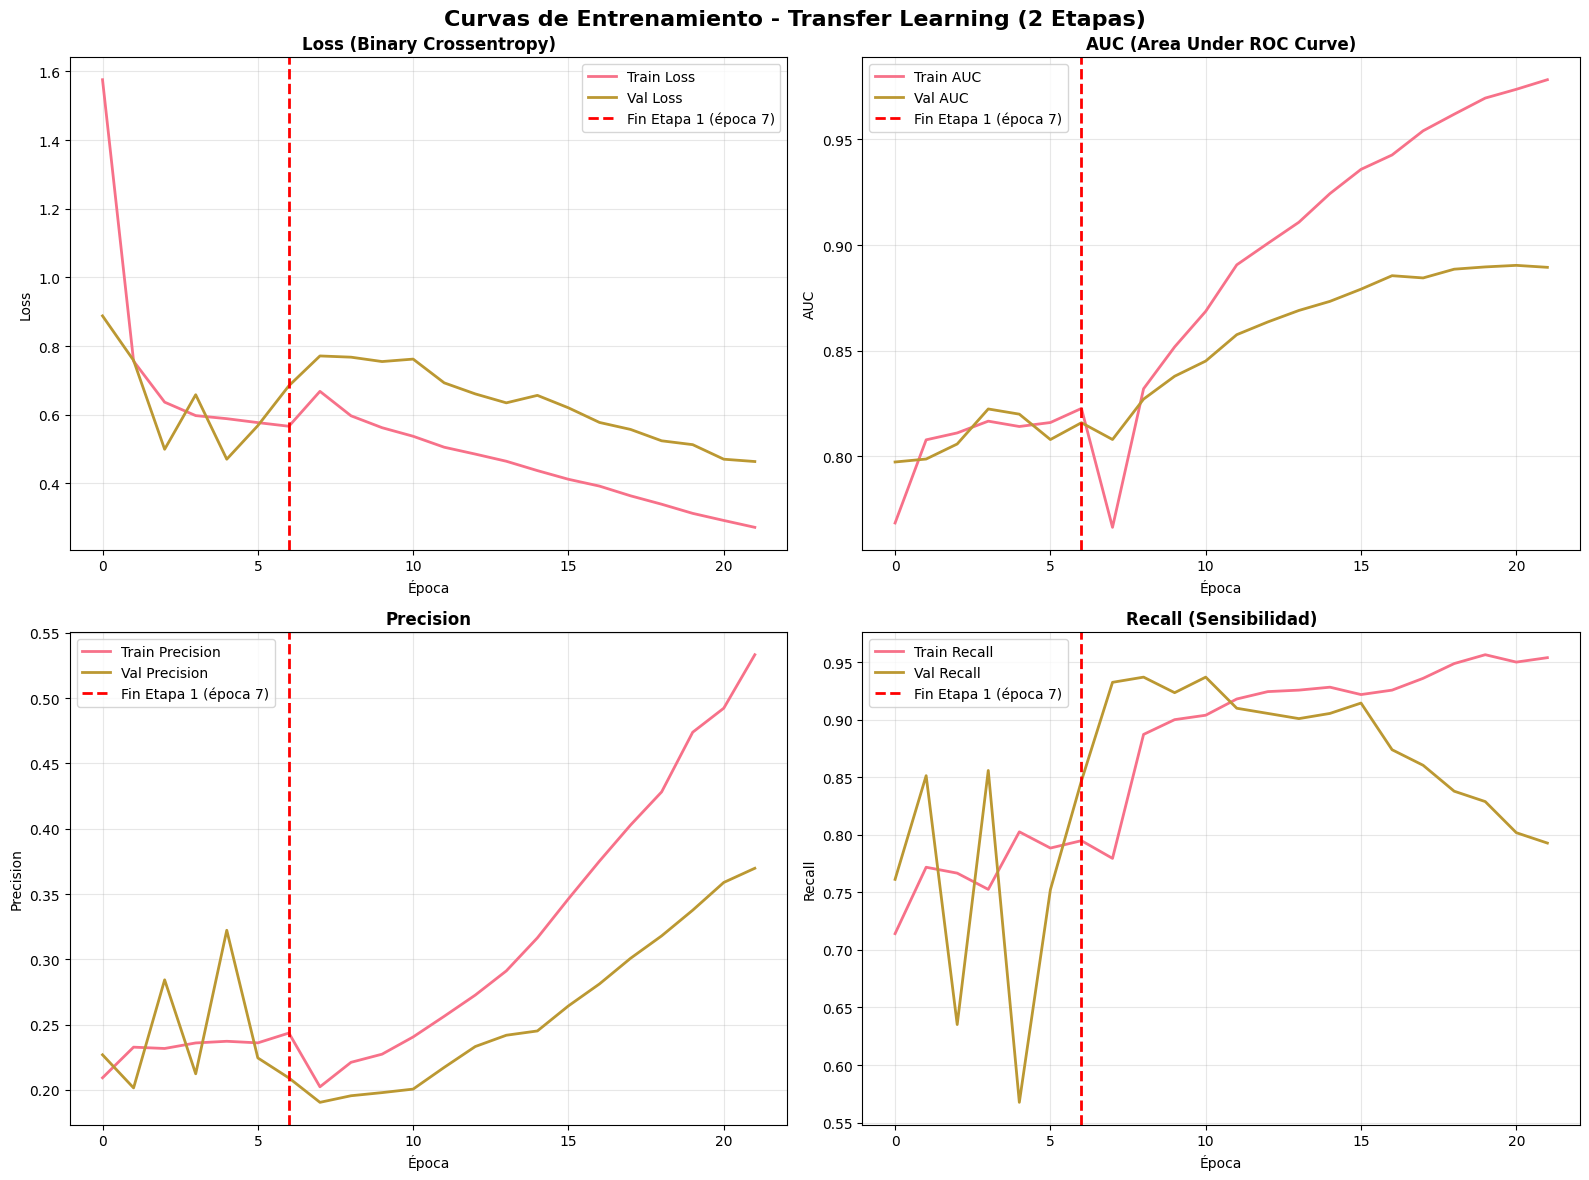


Gráfico guardado en: training_curves_finetuning.png


In [48]:
import matplotlib.pyplot as plt

# Combinar historiales de ambas etapas
def combine_histories(hist1, hist2):
    """Combina dos historiales de entrenamiento"""
    combined = {}
    for key in hist1.history.keys():
        combined[key] = hist1.history[key] + hist2.history[key]
    return combined

combined_history = combine_histories(history_stage1, history_stage2)

# Configurar la figura
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Curvas de Entrenamiento - Transfer Learning (2 Etapas)', 
             fontsize=16, fontweight='bold')

# Marcar la separación entre etapas
epoch_split = len(history_stage1.history['loss'])
total_epochs = len(combined_history['loss'])

# Gráfico 1: Loss
ax1 = axes[0, 0]
ax1.plot(combined_history['loss'], label='Train Loss', linewidth=2)
ax1.plot(combined_history['val_loss'], label='Val Loss', linewidth=2)
ax1.axvline(x=epoch_split-1, color='red', linestyle='--', linewidth=2, 
            label=f'Fin Etapa 1 (época {epoch_split})')
ax1.set_title('Loss (Binary Crossentropy)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(alpha=0.3)

# Gráfico 2: AUC
ax2 = axes[0, 1]
ax2.plot(combined_history['auc'], label='Train AUC', linewidth=2)
ax2.plot(combined_history['val_auc'], label='Val AUC', linewidth=2)
ax2.axvline(x=epoch_split-1, color='red', linestyle='--', linewidth=2,
            label=f'Fin Etapa 1 (época {epoch_split})')
ax2.set_title('AUC (Area Under ROC Curve)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Época')
ax2.set_ylabel('AUC')
ax2.legend()
ax2.grid(alpha=0.3)

# Gráfico 3: Precision
ax3 = axes[1, 0]
ax3.plot(combined_history['precision'], label='Train Precision', linewidth=2)
ax3.plot(combined_history['val_precision'], label='Val Precision', linewidth=2)
ax3.axvline(x=epoch_split-1, color='red', linestyle='--', linewidth=2,
            label=f'Fin Etapa 1 (época {epoch_split})')
ax3.set_title('Precision', fontsize=12, fontweight='bold')
ax3.set_xlabel('Época')
ax3.set_ylabel('Precision')
ax3.legend()
ax3.grid(alpha=0.3)

# Gráfico 4: Recall
ax4 = axes[1, 1]
ax4.plot(combined_history['recall'], label='Train Recall', linewidth=2)
ax4.plot(combined_history['val_recall'], label='Val Recall', linewidth=2)
ax4.axvline(x=epoch_split-1, color='red', linestyle='--', linewidth=2,
            label=f'Fin Etapa 1 (época {epoch_split})')
ax4.set_title('Recall (Sensibilidad)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Época')
ax4.set_ylabel('Recall')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('training_curves_finetuning.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico guardado en: training_curves_finetuning.png")

In [49]:
# Resumen de resultados finales
print("="*60)
print("RESUMEN DEL ENTRENAMIENTO")
print("="*60)

print(f"\nETAPA 1 (Solo cabeza - {len(history_stage1.history['loss'])} épocas):")
print(f"  Train Loss: {history_stage1.history['loss'][-1]:.4f}")
print(f"  Val Loss:   {history_stage1.history['val_loss'][-1]:.4f}")
print(f"  Train AUC:  {history_stage1.history['auc'][-1]:.4f}")
print(f"  Val AUC:    {history_stage1.history['val_auc'][-1]:.4f}")

print(f"\nETAPA 2 (Fine-tuning - {len(history_stage2.history['loss'])} épocas):")
print(f"  Train Loss: {history_stage2.history['loss'][-1]:.4f}")
print(f"  Val Loss:   {history_stage2.history['val_loss'][-1]:.4f}")
print(f"  Train AUC:  {history_stage2.history['auc'][-1]:.4f}")
print(f"  Val AUC:    {history_stage2.history['val_auc'][-1]:.4f}")

print(f"\nMEJOR MODELO (guardado):")
best_val_auc = max(combined_history['val_auc'])
best_epoch = combined_history['val_auc'].index(best_val_auc) + 1
print(f"  Mejor Val AUC: {best_val_auc:.4f} (época {best_epoch})")
print(f"  Archivo: best_model_stage2.keras")

print("\n" + "="*60)
print("FINE-TUNING COMPLETADO EXITOSAMENTE")
print("="*60)
print("\nPróximos pasos:")
print("  1. Evaluar el modelo en el conjunto de test")
print("  2. Calcular métricas detalladas (ROC-AUC, PR-AUC, Confusion Matrix)")
print("  3. Ajustar umbral de decisión para maximizar recall")
print("  4. Implementar XAI (Grad-CAM) para interpretabilidad")
print("\n" + "="*60)

RESUMEN DEL ENTRENAMIENTO

ETAPA 1 (Solo cabeza - 7 épocas):
  Train Loss: 0.5666
  Val Loss:   0.6845
  Train AUC:  0.8227
  Val AUC:    0.8159

ETAPA 2 (Fine-tuning - 15 épocas):
  Train Loss: 0.2721
  Val Loss:   0.4638
  Train AUC:  0.9782
  Val AUC:    0.8895

MEJOR MODELO (guardado):
  Mejor Val AUC: 0.8904 (época 21)
  Archivo: best_model_stage2.keras

FINE-TUNING COMPLETADO EXITOSAMENTE

Próximos pasos:
  1. Evaluar el modelo en el conjunto de test
  2. Calcular métricas detalladas (ROC-AUC, PR-AUC, Confusion Matrix)
  3. Ajustar umbral de decisión para maximizar recall
  4. Implementar XAI (Grad-CAM) para interpretabilidad

